# Лабораторная работа 3.2.3: Резонанс токов 

## Экспериментальные данные 

Напряжения от частоты в резонансе

 u


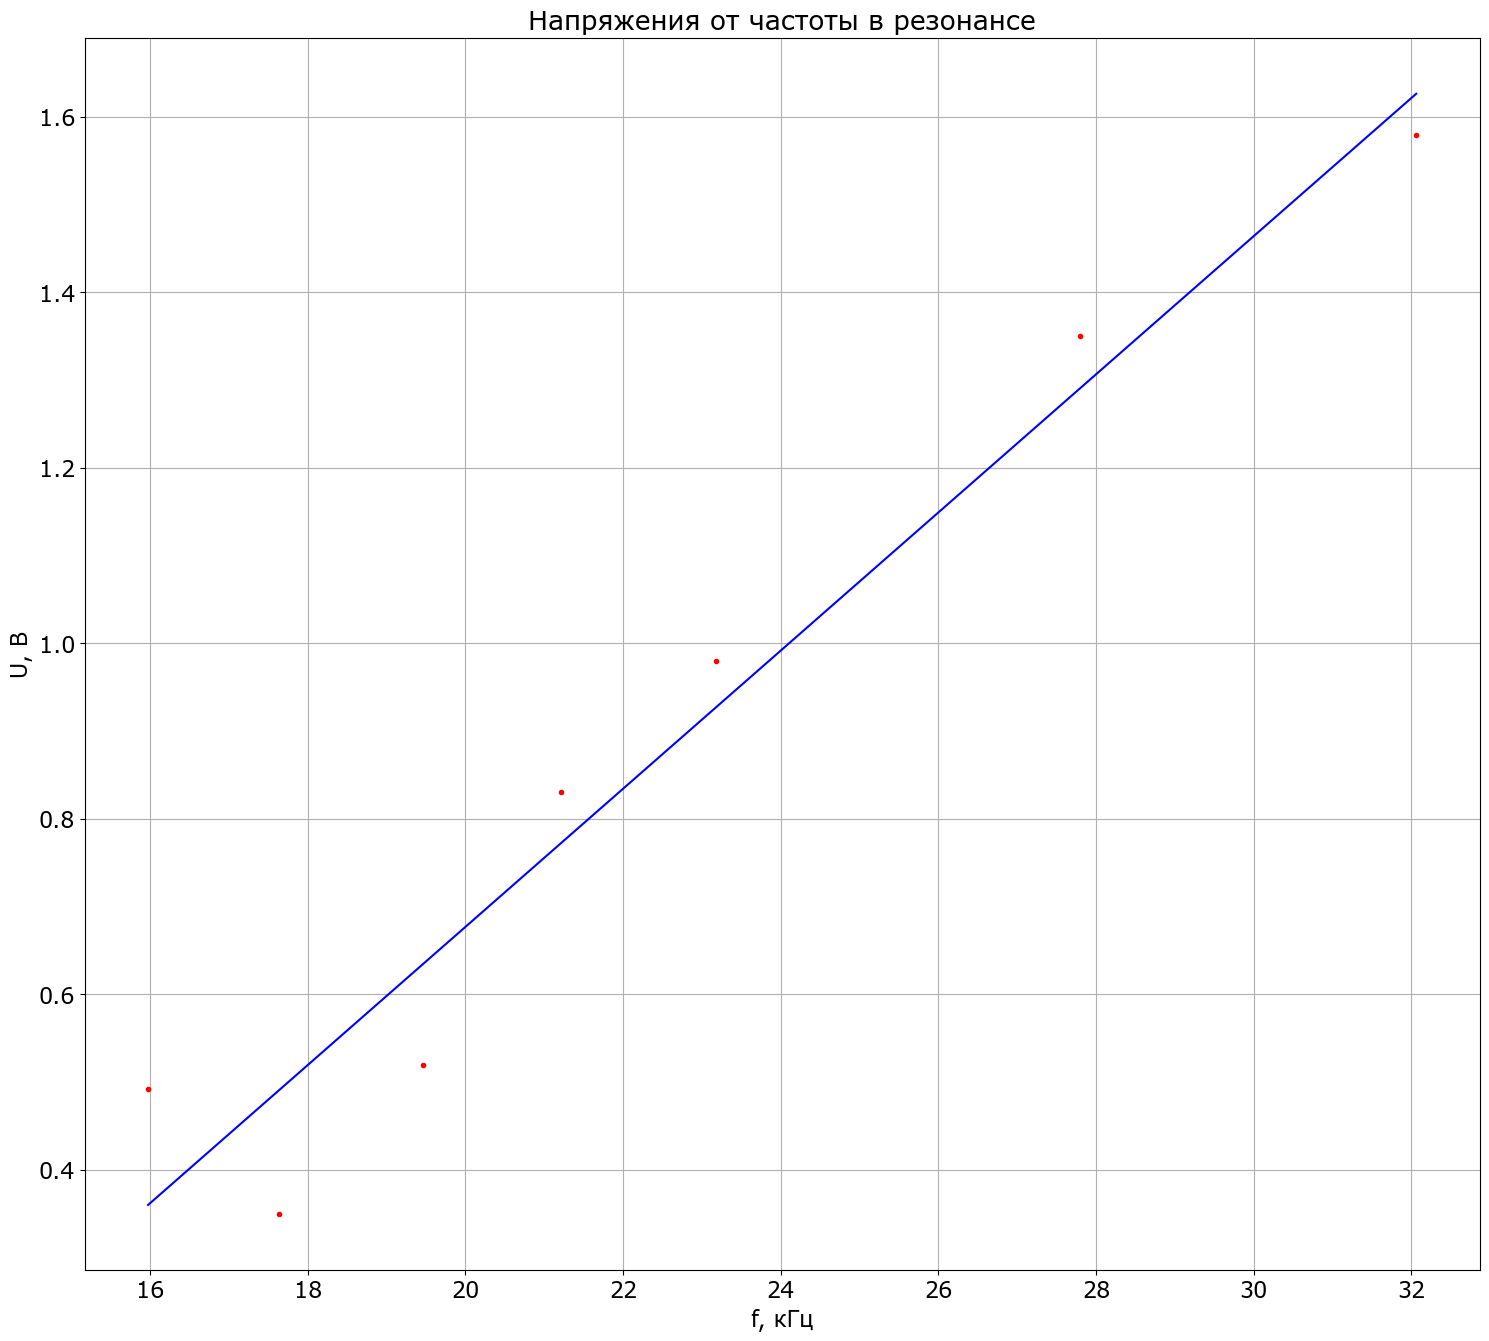

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


def chi_linear(x, y, e):
    err = tuple(1 / (i**2) for i in e)
    # 0 for k, 1 for b, 2 for kerr, 3 for berr
    sqx = tuple(i ** 2 for i in x)
    sqy = tuple(i ** 2 for i in y)
    xy = tuple(i * j for i, j in zip(x, y))
    def w(var):
        norm = 1 / sum(err)
        summ = sum(i * j for i, j in zip(var, err))
        return norm * summ
    def w_abnorm(var):
        summ = sum(i for i in var)
        return summ / len(var)
    k = (w(xy) - w(x)* w(y)) / (w(sqx) - (w(x))**2)
    k_abnorm = (w_abnorm(xy) - w_abnorm(x)* w_abnorm(y)) / (w_abnorm(sqx) - (w_abnorm(x))**2)
    b = w(y) - k * w(x)
    D = ((w_abnorm(sqy) - (w_abnorm(y))**2) / (w_abnorm(sqx) - (w_abnorm(x))**2)) - k_abnorm**2
    kerr = np.sqrt(1/(len(x) - 2)) * np.sqrt(D)
    berr = kerr * np.sqrt(w(sqx))
    return (k, b, kerr, berr)

mpl.rcParams['font.size'] = 16
plt.figure(figsize=(18,16))

plt.title(r'Напряжения от частоты в резонансе')
plt.ylabel('E, В')
plt.xlabel('f, кГц')
plt.grid(True)

C = (25.1, 33.2, 47.3, 57.4, 67.5, 82.7, 101.6) # Нф; R = 3.50 ohm, R_1 = 1008 ohm
f = (32.061, 27.791, 23.184, 21.213, 19.467, 17.641, 15.974) # Кгц
u = (1.5794, 1.3496, 0.9800, 0.8306, 0.5200, 0.3500, 0.4924) #В
e = (0.3004, 0.3007, 0.3006, 0.3003, 0.3002, 0.3001, 0.3001)
r = tuple(0.0001 for i in u)

a = input() # Write u for graph of U(f), write e for graph of E(f)

if a == "u":
    plt.ylabel('U, В')
    plt.grid(True)
    plt.errorbar(f, u, fmt='r.')
    L = chi_linear(f, u, r) # Returns kx + b, where L[0] gives k, and L[1] gives b
    l = tuple(L[0]*i + L[1] for i in f)
    plt.plot(f, l, 'b-')


if a == "e":
    plt.ylabel('E, В')
    plt.grid(True)
    plt.errorbar(f, e, fmt='r.')
    L = chi_linear(f, e, r)
    l = tuple(L[0]*i + L[1] for i in f)
    plt.plot(f, l, 'b-')

Напряжения от частоты для двух ёмкостей

In [ ]:
# С2

f2 = (27.7, 28.2, 28.3, 28.5, 28.1, 28.7, 28.334, 28,739, 27.609, 27.292, 26.933, 27.422, 27.323, 27.163, 27.270, 27.552)
u2 = (1.288, 1.044, 1.01, 0.829, 1.134, 0.6623, 0.9612, 0.6815, 1.2157, 0.9150, 0.6642, 1.0403, 0.9413, 0.8135, 0.8918, 1.1684)
e2 = (0.2996, 0.2995, 0.2994, 0.2995, 0.2991, 0.2991, 0.2991, 0.2992, 0.2991, 0.2991, 0.2990, 0.2990, 0.2990, 0.2990)
# C6 

f6 = (17.843, 17.993, 18.230, 18.173, 18.360, 18.399, 17.425, 17.170, 17.238, 17,113,
17.7078, 17.039)
u6 = (0.5025, 0.4011, 0.4227, 0.3542, 93449, 0.4851, 0.3480, 1.4045, 1.3534, 0.3459, 0.3306)
e6 = (0.2990, 0.2990, 0.2928, 0.9298, 0.2988, 0.2987, 0.2987, 0.2989, 0.2989, 0.2989, 0.2988, 0.2988)

Исследование фаз

In [6]:
# C2

ff2 =(27.967,28.212,28.386,28.733,28.914,30.003,27.565,27.280,26.843,26.297,25.860,27.039)
uf2 = (1.2713,1.068,0.905,0.6785,0.5920,0.3248,1.18,0.9190,0.6101,0.4139,0.3270,0.7234)
ef2= (0.2979,0.2978,9,0.2978,0.2978180,20.2977,0.2976,3.029780,50.2977,0.2977,0.2977,0.2977)
x02 = (9, 9, 9, 9, 9, 8.5, 9.5, 9.5, 10, 10, 10, 10)
x2 = (1, 2, 3, 3, 3.5, 4, 1.5, 2, 3, 3.5, 4, 3)
print(len(ff2), len(uf2), len(ef2), len(x02), len(x2))
# C6

ff6 = (17.818, 18.060, 18.195, 18.575, 18.883, 19.125, 19.380, 19.780, 17.565, 17.183, 16.818, 16.429, 16.160, 16.606)
uf6 = (0.5211, 0.4452, 0.3989, 0.2865, 0.2273, 0.1945, 0.1689, 0.1401, 0.5175, 0.3761, 0.265, 0.196, 0.1645, 0.2228)
e6 = (0.2971, 0.2972, 0.2971, 0.297, 0.2971, 0.297, 0.297, 0.297, 0.297, 0.297, 0.297, 0.297, 0.297, 0.2969)
x06 = (14.5, 14, 14, 14, 13.5, 13.5, 13, 13, 15, 15, 15.5, 16, 16, 15.5)
x6 = (1, 2, 3, 4, 4.5, 5, 5, 5.5, -1.5, -4, -5, -5.5, -6, -5)
print(len(ff6), len(uf6), len(e6), len(x06), len(x6))

12 12 12 12 12
14 14 14 14 14


## Пример построения графика

Which one?  focfor 


0 & 0 & 14.7 \\
\hline
1 & 0.5 & 12.2 \\
\hline
2 & 1.15 & 8.9 \\
\hline
3 & 1.63 & 6.5 \\
\hline
4 & 2.27 & 3.3 \\
\hline
5 & 2.78 & 0.7 \\
\hline
6 & 3.32 & -2.0 \\
\hline
k=  125834 ± 3430


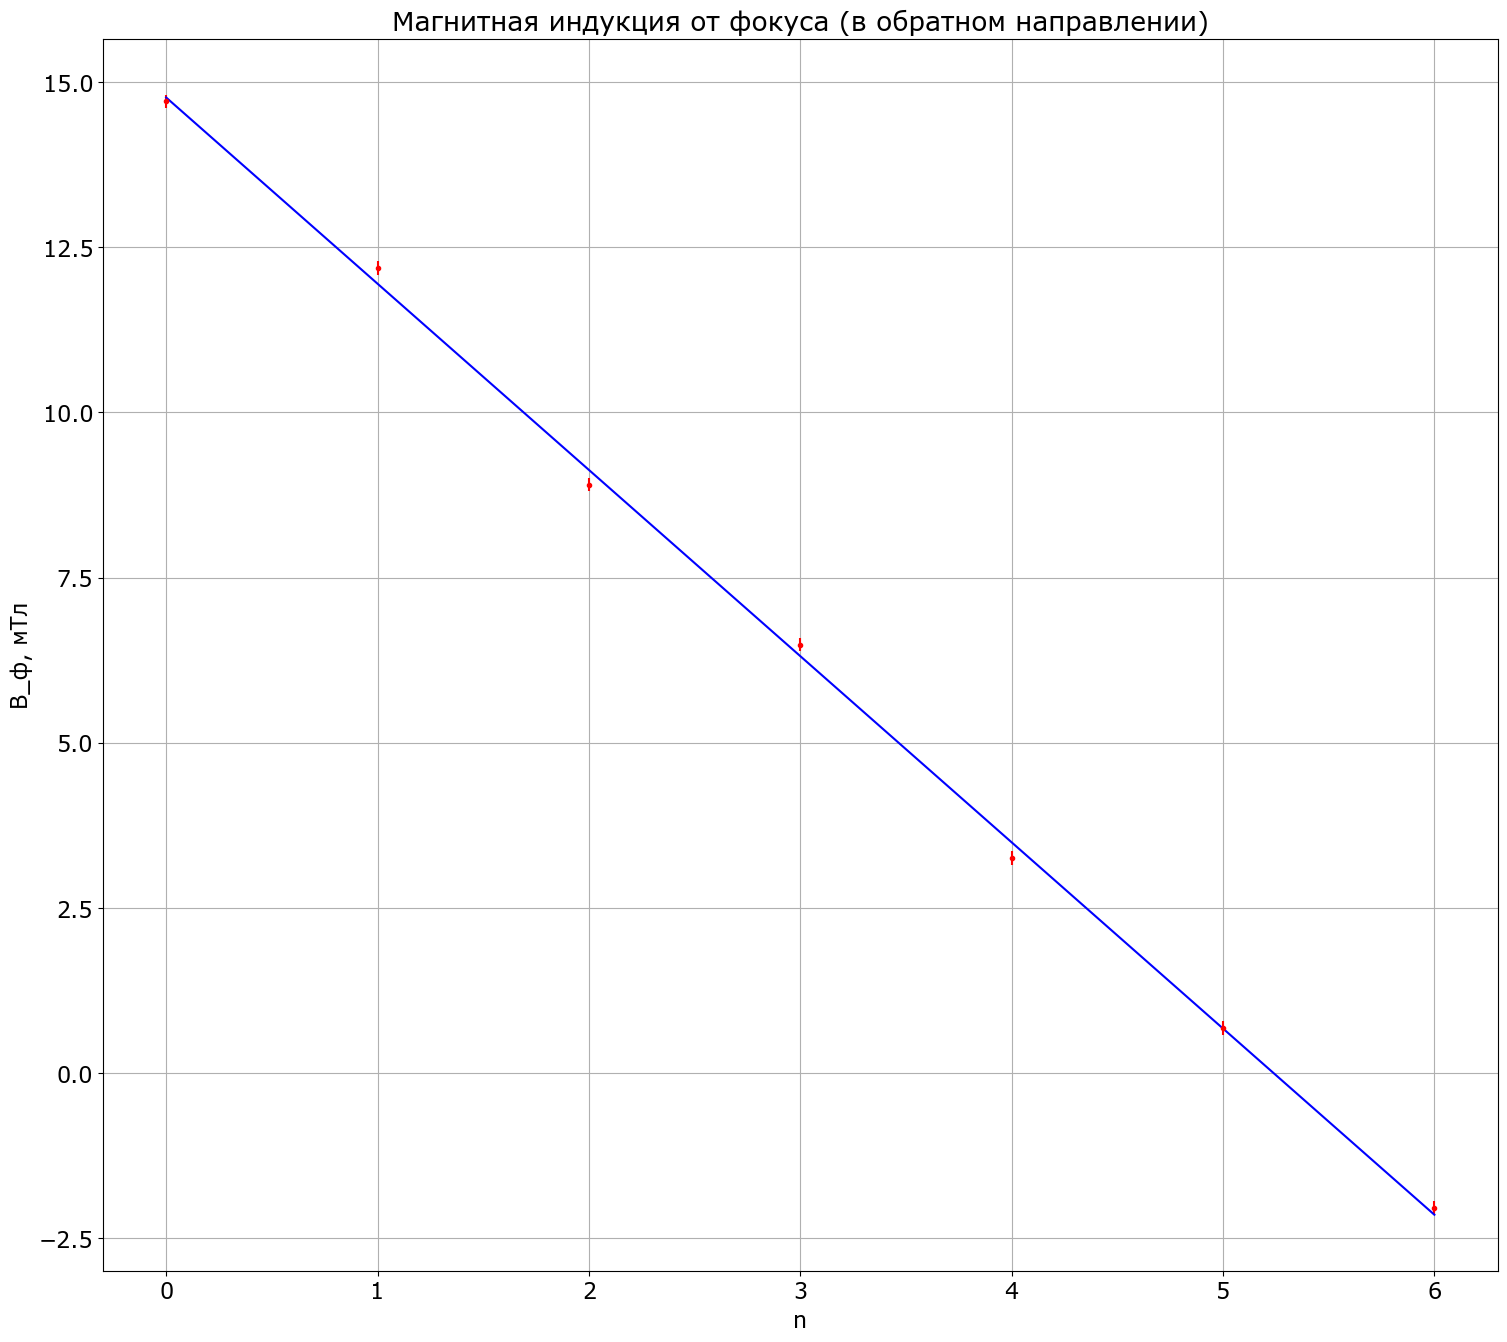

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


def chi_linear(x, y, e):
    err = tuple(1 / (i**2) for i in e)
    # 0 for k, 1 for b, 2 for kerr, 3 for berr
    sqx = tuple(i ** 2 for i in x)
    sqy = tuple(i ** 2 for i in y)
    xy = tuple(i * j for i, j in zip(x, y))
    def w(var):
        norm = 1 / sum(err)
        summ = sum(i * j for i, j in zip(var, err))
        return norm * summ
    def w_abnorm(var):
        summ = sum(i for i in var)
        return summ / len(var)
    k = (w(xy) - w(x)* w(y)) / (w(sqx) - (w(x))**2)
    k_abnorm = (w_abnorm(xy) - w_abnorm(x)* w_abnorm(y)) / (w_abnorm(sqx) - (w_abnorm(x))**2)
    b = w(y) - k * w(x)
    D = ((w_abnorm(sqy) - (w_abnorm(y))**2) / (w_abnorm(sqx) - (w_abnorm(x))**2)) - k_abnorm**2
    kerr = np.sqrt(1/(len(x) - 2)) * np.sqrt(D)
    berr = kerr * np.sqrt(w(sqx))
    return (k, b, kerr, berr)

mpl.rcParams['font.size'] = 16
plt.figure(figsize=(18,16))

plt.title(r'Магнитная индукция от тока')
plt.ylabel('B_ф, мТл')
plt.xlabel('I, А')
plt.grid(True)

j1 = (0.19, 0.30, 0.40, 0.50, 0.61, 0.70, 0.81, 0.90, 1.00, 1.09, 1.21, 1.32)  #1 - в обратном, 2 - в прямом

f1 = (0.50, 1.15, 1.63, 2.27, 2.78, 3.32)

f1 = (3.60, 3.50, 3.40, 3.20, 3.10, 3.00, 2.80, 2.70, 2.60, 2.40, 2.30, 2.10) 

b1 = tuple(i/0.265 for i in f1)

e1 = tuple(0.1 for i in b1)

L1 = chi_linear(j1, b1, e1)

jf1 = (0, 0.50, 1.15, 1.63, 2.27, 2.78, 3.32)

j2 = (0.15, 0.32, 0.46, 0.56, 0.74, 0.94, 1.13, 1.38, 1.59, 1.70, 1.92, 2.09, 2.38, 2.71, 2.86, 3.19, 3.36, 3.54, 3.62)

f2 = (1.60, 1.80, 2.00, 2.10, 2.30, 2.60, 2.80, 3.10, 3.40, 3.55, 3.70, 4.00, 4.40, 4.80, 5.00, 5.40, 5.50, 5.70, 5.90)

b2 = tuple(i/0.265 for i in f2)

e2 = tuple(0.1 for i in b2)

L2 = chi_linear(j2, b2, e2)

jf2 = (0, 0.53, 1.04, 1.64, 2.17, 2.70, 3.30)

ns = range(7)

ef = tuple(0.1 for i in range(7))

a = input('Which one? ')

if a == 'for':
    plt.title(r'Магнитная индукция от тока (в прямом направлении)')
    plt.ylabel('B_ф, мТл')
    plt.xlabel('I, А')
    plt.grid(True)
    L1 = chi_linear(j2, b2, e2)
    plt.errorbar(j2, b2, yerr=e2, fmt="r.")
    l = tuple(L1[0]*i + L1[1] for i in j2)
    plt.plot(j2, l, 'b-')
    for (x, y, z) in zip(j2, f2, b2):
        print(round(x, 2), '&', round(y, 2), '&', round(z, 1), '\\\\')
        print('\\hline')
    print('k= ', round(L2[0], 2), '±', round(L2[2], 2))

elif a == 'bac':
    plt.title(r'Магнитная индукция от тока (в обратном направлении)')
    plt.ylabel('B_ф, мТл')
    plt.xlabel('I, А')
    plt.grid(True)
    L1 = chi_linear(j1, b1, e1)
    plt.errorbar(j1, b1, yerr=e1, fmt="r.")
    l = tuple(L1[0]*i + L1[1] for i in j1)
    plt.plot(j1, l, 'b-')
    for (x, y, z) in zip(j1, f1, b1):
        print(round(x, 2), '&', round(y, 2), '&', round(z, 1), '\\\\')
        print('\\hline')
    print('k= ', round(L1[0], 2), '±', round(L1[2], 2))
    
elif a == "focfor":
    plt.title(r'Магнитная индукция от фокуса (в прямом направлении)')
    plt.ylabel('B_ф, мТл')
    plt.xlabel('n')
    plt.grid(True)
    l = tuple(L2[0]*i + L2[1] for i in jf2)
    plt.errorbar(ns, l, yerr=ef, fmt="r.")
    for x, y, z in zip(ns, l, jf2):
        print(x, '&', round(z, 2), '&', round(y, 1), '\\\\')
        print('\\hline')
    Lf2 = chi_linear(ns, l, ef)
    ls = tuple(Lf2[0]*i + Lf2[1] for i in ns)
    plt.plot(ns, ls, 'b-')
    ans = ((abs(Lf2[0])) ** -2) * 1e6 
    shift = 2 * (Lf2[2] / Lf2[0])
    print(Lf2[1])
    print('k= ', round(ans), '±', round(shift*ans))
    
else:
    plt.title(r'Магнитная индукция от фокуса (в обратном направлении)')
    plt.ylabel('B_ф, мТл')
    plt.xlabel('n')
    plt.grid(True)
    l = tuple(L1[0]*i + L1[1] for i in jf1)
    plt.errorbar(ns, l, yerr=ef, fmt="r.")
    for x, y, z in zip(ns, l, jf1):
        print(x, '&', round(z, 2), '&', round(y, 1), '\\\\')
        print('\\hline')
    Lf1 = chi_linear(ns, l, ef)
    ls = tuple(Lf1[0]*i + Lf1[1] for i in ns)
    plt.plot(ns, ls, 'b-')
    ans = (((Lf1[0])) ** -2) * 1e6
    shift = 2 * abs(Lf1[2] / Lf1[0])   
    print('k= ', round(ans), '±', round(shift*ans))
# Output the table for the forward and backward current decrease

# Find magnetic flux density at focus (second graph)